# Bout, Stim, and Duration Post Hoc Analysis(CSV for Database) 

In [2]:
import joblib
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tqdm import tqdm
from tqdm import notebook
import itertools
import math
import seaborn as sns
import statistics 
from collections import OrderedDict
import csv
import re

In [4]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load posthoc-predictions.npy')

%gui tk

infiles

('/Users/kaycei/K on Server (NoMachine)/KayCei/HDC/AH1-KO/012924- Tube/predict_video_exp_16.npy',)

### Use for HDC Mice 

In [5]:
filepath = infiles[0]
parts = filepath.split('/')
directory_path = '/'.join(parts[:-1])  # Join all parts except the last two
file_name = ''.join(parts[-3:-1])  # Join the last two parts
# Remove numerals (digits) from the file name
file_name = re.sub(r'\d', '', file_name)
print("Directory Path:", directory_path)
print("File Name:", file_name)


Directory Path: /Users/kaycei/K on Server (NoMachine)/KayCei/HDC/AH1-KO/012924- Tube
File Name: AH-KO- Tube


### Use for WT Mice 

In [25]:
filepath = infiles[0]
parts = filepath.split('/')
print(parts)
directory_path = '/'.join(parts[:-1])  # Join all parts except the last two
file_name = parts[-4] # Join the last two parts
# Remove numerals (digits) from the file name
#file_name = re.sub(r'\d', '', file_name)
print("Directory Path:", directory_path)
print("File Name:", file_name)


['', 'Users', 'kaycei', 'K on Server (NoMachine)', 'KayCei', 'AD6-D2', 'videos', '071823-rt bilateral sham', 'predict_video_exp_16.npy']
Directory Path: /Users/kaycei/K on Server (NoMachine)/KayCei/AD6-D2/videos/071823-rt bilateral sham
File Name: AD6-D2


In [6]:
Random_List = [] #creates a array known as random list 
for f in range(len(infiles)):
    arr = np.load(infiles[f])
    Random_List.extend(arr) 
#print(Random_List)

# Total Time of Video in deciseconds

In [7]:
duration_in_deciseconds = len(Random_List)
duration_in_minutes = duration_in_deciseconds / 600
duration_in_frames = duration_in_deciseconds * 3

print('This video is', duration_in_deciseconds, 'deciseconds, which is', duration_in_minutes, 'minutes, which is', duration_in_frames, 'frames')
#print(Random_List)

This video is 39795 deciseconds, which is 66.325 minutes, which is 119385 frames


## Creating Array

## Time Integration (deciseconds) 

In [8]:
BehaviorTime = []

for index, value in enumerate(Random_List):
    BehaviorTime.append((value, index))

In [9]:
#print(BehaviorTime)

In [10]:
from collections import OrderedDict

# Initialize the behavior_labels dictionary
behavior_labels = OrderedDict({
    0.0: "insignificant",
    1.0: "insignificant",
    2.0: "insignificant",
    3.0: "insignificant",
    4.0: "insignificant",
    5.0: "insignificant",
    6.0: "Rear",
    7.0: "Investigate Type 1",
    8.0: "Investigate Type 2", 
    9.0: "Contra-Itch",
    10.0: "Investigate Type 3",
    11.0: "insignificant",
    12.0: "insignificant",
    13.0: "insignificant",
    14.0: "Contra-Body Groom",
    15.0: "Face Groom Type 1",
    16.0: "Dive/Scrunch",
    17.0: "Head Groom",
    18.0: "Ipsi-Orient",
    19.0: "insignificant",
    20.0: "Face Groom Type 2",
    21.0: "Ipsi-Body Groom",
    22.0: "Ipsi-Itch Type 1",
    23.0: "insignificant",
    24.0: "insignificant",
    25.0: "Paw-Groom",
    26.0: "Locomotion",
    27.0: "insignificant",
    28.0: "Contra-Orient",
})

# Initialize an empty dictionary to store counts for each behavior label
behavior_counts = OrderedDict()

# Iterate through Random_List and count instances for each behavior label
for value, index in BehaviorTime:
    label = behavior_labels.get(value, "Unknown")  # Get the label or "Unknown" if not found
    if label not in behavior_counts:
        behavior_counts[label] = 0  # Initialize the count for the label if not already present
    behavior_counts[label] += 1

# Print the counts for each behavior label in the original order
for label, count in behavior_counts.items():
    print(f"{label},{count}")


Locomotion,16036
Investigate Type 2,12183
Contra-Orient,2098
Contra-Itch,2462
Investigate Type 1,639
Ipsi-Orient,1985
insignificant,2731
Ipsi-Itch Type 1,274
Dive/Scrunch,175
Face Groom Type 1,174
Ipsi-Body Groom,305
Investigate Type 3,263
Rear,212
Head Groom,29
Paw-Groom,14
Contra-Body Groom,211
Face Groom Type 2,4


### Ensures you only analyze expected length of  Session 


length_of_session = (int(input("How long was the session in minutes?"))) * 600
print(length_of_session)
BehaviorTime = BehaviorTime[:(length_of_session+1)]

#### Removes all info after selected end time 

In [11]:
print('This video is ', len(BehaviorTime), ' deciseconds, which is', (len(BehaviorTime)/600), 'minutes' )
print()
#print(BehaviorTime)

This video is  39795  deciseconds, which is 66.325 minutes



## Adds Stim Count and Frame Rate to Array 

In [12]:
for z in BehaviorTime:
    behavior = z[0]
    time= z[1]
behavior_type_and_duration = []
current_behavior = BehaviorTime[0][0]
current_time = BehaviorTime[0][1]  
duration = 0
stim_count=0
frames = 0

for behavior, time in BehaviorTime:
    if behavior == current_behavior:
        duration += 1
        if duration == 1:
            start_time= current_time
    else:
        if duration==1:
            end_time=start_time+1
        else:
            end_time= start_time + duration
        frames= duration*3
        stim_count= round(duration/3)
        behavior_type_and_duration.append((current_behavior, duration,frames,stim_count,start_time, end_time))
        current_behavior = behavior
        current_time = time
        start_time= time
        duration = 1
        end_time= time+1
        
# Append the final (current_behavior, current_time, count) tuple outside the loop
behavior_type_and_duration.append((current_behavior, duration, frames, stim_count, start_time, end_time))

# Make a copy of the original behavior_type_and_duration list
behaviortdt= list(behavior_type_and_duration)

In [13]:
print(behaviortdt)
#print(len(behaviortdt))

[(26, 1, 3, 0, 0, 1), (8, 2, 6, 1, 1, 3), (26, 1, 3, 0, 3, 4), (28, 1, 3, 0, 4, 5), (9, 1, 3, 0, 5, 6), (7, 1, 3, 0, 6, 7), (18, 1, 3, 0, 7, 8), (7, 2, 6, 1, 8, 10), (9, 1, 3, 0, 10, 11), (28, 1, 3, 0, 11, 12), (27, 1, 3, 0, 12, 13), (28, 1, 3, 0, 13, 14), (26, 3, 9, 1, 14, 17), (8, 1, 3, 0, 17, 18), (26, 1, 3, 0, 18, 19), (23, 1, 3, 0, 19, 20), (8, 4, 12, 1, 20, 24), (28, 1, 3, 0, 24, 25), (5, 1, 3, 0, 25, 26), (8, 1, 3, 0, 26, 27), (26, 1, 3, 0, 27, 28), (8, 2, 6, 1, 28, 30), (26, 1, 3, 0, 30, 31), (8, 1, 3, 0, 31, 32), (26, 1, 3, 0, 32, 33), (27, 1, 3, 0, 33, 34), (8, 1, 3, 0, 34, 35), (26, 1, 3, 0, 35, 36), (8, 2, 6, 1, 36, 38), (28, 3, 9, 1, 38, 41), (26, 3, 9, 1, 41, 44), (8, 1, 3, 0, 44, 45), (27, 1, 3, 0, 45, 46), (26, 15, 45, 5, 46, 61), (8, 1, 3, 0, 61, 62), (26, 1, 3, 0, 62, 63), (8, 7, 21, 2, 63, 70), (18, 1, 3, 0, 70, 71), (26, 5, 15, 2, 71, 76), (8, 1, 3, 0, 76, 77), (26, 2, 6, 1, 77, 79), (8, 1, 3, 0, 79, 80), (18, 1, 3, 0, 80, 81), (8, 1, 3, 0, 81, 82), (26, 1, 3, 0, 82

In [14]:
#length_of_session = (int(input("How long was the session in minutes?"))) * 600 
#print(length_of_session) 
behaviortdt = [tup for tup in behaviortdt if tup[4] <= 39001]

In [15]:
print('This video is ', behaviortdt[-1][-1], ' deciseconds, which is', (behaviortdt[-1][-1]/600), 'minutes' )
print()
#print(behaviortdt)

This video is  39003  deciseconds, which is 65.005 minutes



## Add Bout Count to the Array 

In [16]:
enumerated_behaviortdt = []
behavior_index = {}  # Dictionary to store behavior and its corresponding index

for behavior, duration, frames, stim_count, start_time, end_time in behaviortdt:
    if behavior not in behavior_index:
        behavior_index[behavior] = 1
    else:
        behavior_index[behavior] += 1
    
    bout = behavior_index[behavior]
    enumerated_behaviortdt.append((behavior,stim_count,frames, bout, duration,start_time,end_time))

#print(enumerated_behaviortdt)

# Stim Count Calcultaion

In [17]:
#BCBDT = []

# Calculate durations and update BCBDT
#for behavior, duration, frames, bout, start_time, end_time in enumerated_behaviortdt:
    #stim_count = round(duration / 3)
    #if stim_count < 1:
        #stim_count = 0
    #if stim_count > 0:
        #BCBDT.append((behavior, duration, frames, bout, stim_count, start_time, end_time))

# Print the modified BCBDT
#print("Modified BCBDT:", BCBDT)

# Assign enumerated_behaviortdt to BCBDST
BCBDST = enumerated_behaviortdt


In [18]:
behavior_labels = {
    0.0: "insignificant",
    1.0: "insignificant",
    2.0: "insignificant",
    3.0: "insignificant",
    4.0: "insignificant",
    5.0: "insignificant",
    6.0: "Rear",
    7.0: "Investigate Type 1",
    8.0: "Investigate Type 2", 
    9.0: "Contra-Itch",
    10.0: "Investigate Type 3",
    11.0: "insignificant",
    12.0: "insignificant",
    13.0: "insignificant",
    14.0: "Contra-Body Groom",
    15.0: "Face Groom Type 1",
    16.0: "Dive/Scrunch",
    17.0: "Head Groom",
    18.0: "Ipsi-Orient",
    19.0: "insignificant",
    20.0: "Face Groom Type 2",
    21.0: "Ipsi-Body Groom",
    22.0: "Ipsi-Itch Type 1",
    23.0: "insignificant",
    24.0: "insignificant",
    25.0: "Paw-Groom",
    26.0: "Locomotion",
    27.0: "insignificant",
    28.0: "Contra-Orient",
}

bdbt_dict = {}  # Dictionary to store lists of behaviors

for behavior,stim_count,frames, bout, duration,start_time,end_time in BCBDST:
    behavior_label = behavior_labels.get(behavior, "Unknown Behavior")
    if behavior_label not in bdbt_dict:
        bdbt_dict[behavior_label] = []
    bdbt_dict[behavior_label].append((behavior, stim_count, frames, bout, duration, start_time,end_time))


In [25]:
print(bdbt_dict)

{'Locomotion': [(26, 0, 3, 1, 1, 0, 1), (26, 0, 3, 2, 1, 3, 4), (26, 1, 9, 3, 3, 14, 17), (26, 0, 3, 4, 1, 18, 19), (26, 0, 3, 5, 1, 27, 28), (26, 0, 3, 6, 1, 30, 31), (26, 0, 3, 7, 1, 32, 33), (26, 0, 3, 8, 1, 35, 36), (26, 1, 9, 9, 3, 41, 44), (26, 5, 45, 10, 15, 46, 61), (26, 0, 3, 11, 1, 62, 63), (26, 2, 15, 12, 5, 71, 76), (26, 1, 6, 13, 2, 77, 79), (26, 0, 3, 14, 1, 82, 83), (26, 0, 3, 15, 1, 85, 86), (26, 0, 3, 16, 1, 87, 88), (26, 0, 3, 17, 1, 91, 92), (26, 0, 3, 18, 1, 124, 125), (26, 0, 3, 19, 1, 127, 128), (26, 0, 3, 20, 1, 141, 142), (26, 0, 3, 21, 1, 145, 146), (26, 0, 3, 22, 1, 153, 154), (26, 1, 6, 23, 2, 201, 203), (26, 0, 3, 24, 1, 204, 205), (26, 0, 3, 25, 1, 208, 209), (26, 0, 3, 26, 1, 216, 217), (26, 1, 6, 27, 2, 222, 224), (26, 1, 9, 28, 3, 234, 237), (26, 1, 6, 29, 2, 241, 243), (26, 0, 3, 30, 1, 244, 245), (26, 0, 3, 31, 1, 295, 296), (26, 1, 6, 32, 2, 297, 299), (26, 0, 3, 33, 1, 301, 302), (26, 1, 6, 34, 2, 318, 320), (26, 0, 3, 35, 1, 332, 333), (26, 0, 3, 36

In [20]:
keys_list = bdbt_dict.keys()
print(keys_list)

dict_keys(['Locomotion', 'Investigate Type 2', 'Contra-Orient', 'Contra-Itch', 'Investigate Type 1', 'Ipsi-Orient', 'insignificant', 'Ipsi-Itch Type 1', 'Dive/Scrunch', 'Face Groom Type 1', 'Ipsi-Body Groom', 'Investigate Type 3', 'Rear', 'Head Groom', 'Paw-Groom', 'Contra-Body Groom', 'Face Groom Type 2'])


In [26]:
# Calculate elapsed times and average for each behavior
behavior_averages = {}

for behavior_label, behavior_data in bdbt_dict.items():
    elapsed_times = []
    for i in range(len(behavior_data) - 1):
        elapsed_time = behavior_data[i + 1][-2] - behavior_data[i][-1]
        elapsed_times.append(elapsed_time)
    
    if elapsed_times:
        average_elapsed_time = sum(elapsed_times) / len(elapsed_times)
        behavior_averages[behavior_label] = average_elapsed_time / 10

# Sort behavior averages from lowest to highest
sorted_averages = sorted(behavior_averages.items(), key=lambda x: x[1])

# Print the sorted table
print("Behavior\tAverage Elapsed Time")
print("--------------------------------")
for behavior, average in sorted_averages:
    print(f"{behavior}\t{average}")

Behavior	Average Elapsed Time
--------------------------------
Locomotion	0.4354162803634341
Investigate Type 2	0.5582623155269175
insignificant	1.7482642237222759
Contra-Orient	2.050305385896724
Ipsi-Orient	2.2324683162341583
Contra-Itch	2.9521422797089736
Investigate Type 1	15.038554216867471
Ipsi-Itch Type 1	15.434008097165991
Ipsi-Body Groom	18.251923076923077
Contra-Body Groom	22.839263803680982
Dive/Scrunch	24.50392156862745
Investigate Type 3	25.704794520547942
Rear	31.898319327731095
Face Groom Type 1	37.793
Head Groom	190.0421052631579
Face Groom Type 2	311.7
Paw-Groom	500.65


## Stim Count and Average Duration 

+--------------------+---------------------------+
|        Key         | Average Duration(seconds) |
+--------------------+---------------------------+
|     Locomotion     |           0.288           |
| Investigate Type 2 |           0.252           |
|   Contra-Orient    |           0.114           |
|    Contra-Itch     |           0.195           |
| Investigate Type 1 |           0.256           |
|    Ipsi-Orient     |           0.118           |
|   insignificant    |           0.128           |
|  Ipsi-Itch Type 1  |           0.109           |
|    Dive/Scrunch    |           0.114           |
| Face Groom Type 1  |           0.172           |
|  Ipsi-Body Groom   |           0.136           |
| Investigate Type 3 |           0.178           |
|        Rear        |           0.175           |
|     Head Groom     |           0.145           |
|     Paw-Groom      |            0.2            |
| Contra-Body Groom  |           0.124           |
| Face Groom Type 2  |         

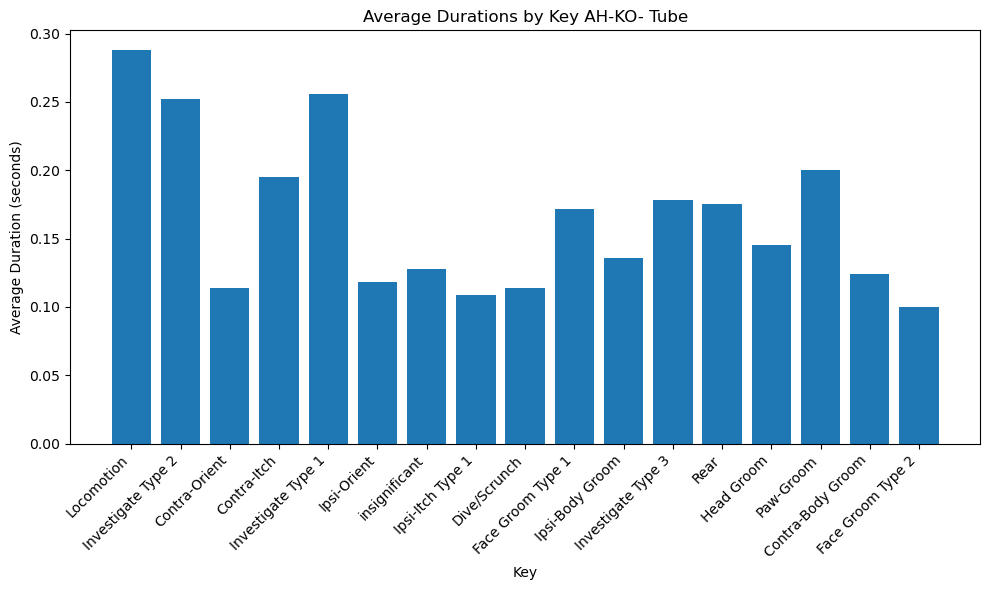

In [21]:
from tabulate import tabulate
import matplotlib.pyplot as plt
import csv

stimcount_by_key = {}

def round_float(value):
    return round(value, 3)

average_duration_by_key = {}

for key, tuples_list in bdbt_dict.items():
    #if key=='insignificant':
        #continue #skip "insignificant" key and its data
    durations = [tuple_item[4] for tuple_item in tuples_list]
    average_duration = ((sum(durations) / len(durations))/10)
    average_duration_by_key[key] = round_float(average_duration)

table_data = [(key, avg_duration) for key, avg_duration in average_duration_by_key.items()]
headers = ["Key", "Average Duration(seconds)"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

# Create a dictionary for the CSV data
csv_data = {f"{file_name}": average_duration_by_key}

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(average_duration_by_key.keys(), average_duration_by_key.values())
plt.xlabel("Key")
plt.ylabel("Average Duration (seconds)")
plt.title(f"Average Durations by Key {file_name}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Use the directory_path as the output directory
output_directory = directory_path
print(output_directory)
# Save the plot as within the output directory
plot_filename = os.path.join(output_directory, f"{file_name} Duration.png")
plt.savefig(plot_filename)

# Save the CSV data to a CSV file within the output directory
csv_filename = os.path.join(output_directory, f"{file_name}-Duration data.csv")
with open(csv_filename, mode="w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    for dictionary_name, data_dict in csv_data.items():
        csv_writer.writerow([dictionary_name])  # Write the dictionary name as a header
        csv_writer.writerow(["Key", "Average Duration (seconds)"])
        for key, avg_duration in data_dict.items():
            csv_writer.writerow([key, avg_duration])

print(f"Plot saved as: {plot_filename}")
print(f"CSV data saved as: {csv_filename}")



In [22]:
# Sort the table_data by average duration in descending order
sorted_table_data = sorted(table_data, key=lambda x: x[1], reverse=True)

# Create a sorted table
sorted_table = tabulate(sorted_table_data, headers, tablefmt="pretty")

# Print the sorted table
print(sorted_table)

+--------------------+---------------------------+
|        Key         | Average Duration(seconds) |
+--------------------+---------------------------+
|     Locomotion     |           0.288           |
| Investigate Type 1 |           0.256           |
| Investigate Type 2 |           0.252           |
|     Paw-Groom      |            0.2            |
|    Contra-Itch     |           0.195           |
| Investigate Type 3 |           0.178           |
|        Rear        |           0.175           |
| Face Groom Type 1  |           0.172           |
|     Head Groom     |           0.145           |
|  Ipsi-Body Groom   |           0.136           |
|   insignificant    |           0.128           |
| Contra-Body Groom  |           0.124           |
|    Ipsi-Orient     |           0.118           |
|   Contra-Orient    |           0.114           |
|    Dive/Scrunch    |           0.114           |
|  Ipsi-Itch Type 1  |           0.109           |
| Face Groom Type 2  |         

##  Number of Bouts

+--------------------+-------------+
|        Key         | Total Bouts |
+--------------------+-------------+
|     Locomotion     |    5394     |
| Investigate Type 2 |    4812     |
|   Contra-Orient    |    1802     |
|    Contra-Itch     |    1238     |
| Investigate Type 1 |     250     |
|    Ipsi-Orient     |    1658     |
|   insignificant    |    2075     |
|  Ipsi-Itch Type 1  |     248     |
|    Dive/Scrunch    |     154     |
| Face Groom Type 1  |     101     |
|  Ipsi-Body Groom   |     209     |
| Investigate Type 3 |     147     |
|        Rear        |     120     |
|     Head Groom     |     20      |
|     Paw-Groom      |      7      |
| Contra-Body Groom  |     164     |
| Face Groom Type 2  |      4      |
+--------------------+-------------+
/Users/kaycei/K on Server (NoMachine)/KayCei/HDC/AH1-KO/012924- Tube
Plot saved as: /Users/kaycei/K on Server (NoMachine)/KayCei/HDC/AH1-KO/012924- Tube/AH-KO- Tube Bout.png
CSV data saved as: /Users/kaycei/K on Server (NoM

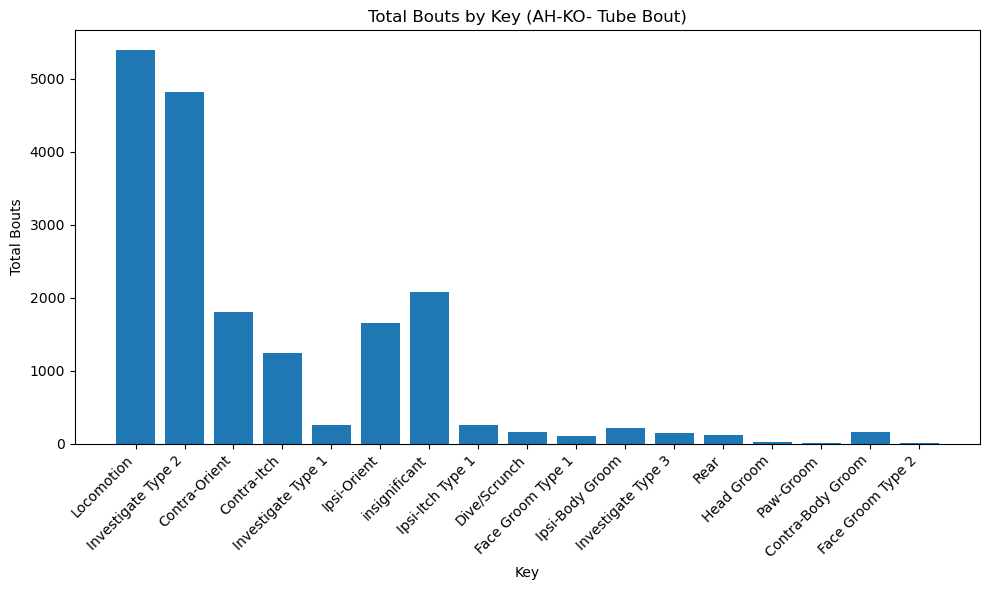

In [23]:
bout_by_key = {}

for key, tuples_list in bdbt_dict.items():
    #if key=='insignificant':
        #continue #skip "insignificant" key and its data
    bouts = [tuple_item[3] for tuple_item in tuples_list]
    sum_of_bouts = len(bouts)
    bout_by_key[key] = sum_of_bouts

table_data = [(key, sum_value) for key, sum_value in bout_by_key.items()]
headers = ["Key", "Total Bouts"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

# Create a dictionary for the CSV data
csv_data_bouts = {f"{file_name}": bout_by_key}
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(bout_by_key.keys(), bout_by_key.values())
plt.xlabel("Key")
plt.ylabel("Total Bouts")
plt.title(f"Total Bouts by Key ({file_name} Bout)")
plt.xticks(rotation=45, ha='right')  # Set the x-axis ticks and labels
plt.tight_layout()

# Use the directory_path as the output directory
output_directory = directory_path
print(output_directory)

# Ensure the output directory exists, and create it if it doesn't
os.makedirs(output_directory, exist_ok=True)

# Save the plot as "AH1 Duration.png" within the output directory
plot_filename = os.path.join(output_directory, f"{file_name} Bout.png")
plt.savefig(plot_filename)

# Save the CSV data to a CSV file within the output directory
csv_filename = os.path.join(output_directory, f"{file_name}- Bout data.csv")
with open(csv_filename, mode="w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    for dictionary_name, data_dict in csv_data_bouts.items():
        csv_writer.writerow([dictionary_name])  # Write the dictionary name as a header
        csv_writer.writerow(["Key", "Total Bouts"])
        for key, sum_value in data_dict.items():
            csv_writer.writerow([key, sum_value])

print(f"Plot saved as: {plot_filename}")
print(f"CSV data saved as: {csv_filename}")


In [24]:
# Sort the table_data by average duration in descending order
sorted_table_data = sorted(table_data, key=lambda x: x[1], reverse=True)

# Create a sorted table
sorted_table = tabulate(sorted_table_data, headers, tablefmt="pretty")

# Print the sorted table
print(sorted_table)

+--------------------+-------------+
|        Key         | Total Bouts |
+--------------------+-------------+
|     Locomotion     |    5394     |
| Investigate Type 2 |    4812     |
|   insignificant    |    2075     |
|   Contra-Orient    |    1802     |
|    Ipsi-Orient     |    1658     |
|    Contra-Itch     |    1238     |
| Investigate Type 1 |     250     |
|  Ipsi-Itch Type 1  |     248     |
|  Ipsi-Body Groom   |     209     |
| Contra-Body Groom  |     164     |
|    Dive/Scrunch    |     154     |
| Investigate Type 3 |     147     |
|        Rear        |     120     |
| Face Groom Type 1  |     101     |
|     Head Groom     |     20      |
|     Paw-Groom      |      7      |
| Face Groom Type 2  |      4      |
+--------------------+-------------+


## Behavior of Interest

In [43]:
for file_path in infiles: # if taking from Z Drive 
    folders = (os.path.dirname(file_path)).split('/')
    print(folders)
    print(len(folders))
    # Check if there are at least 5 elements in the 'folders' list
    if len(folders) >= 5:
        fol3 = folders[3].split('-')  # Split element at position 3 by hyphen
        fol4 = folders[4].split('-')  # Split element at position 4 by hyphen
        
        print("Folder 3:", fol3)
        print("Folder 4:", fol4)
    else:
        print("The folder path does not have enough elements to access positions 3 and 4.")
    

['', 'Users', 'kaycei', 'K on Server (NoMachine)', 'KayCei', 'AD6-D2', 'videos', '071823-rt bilateral sham']
8
Folder 3: ['K on Server (NoMachine)']
Folder 4: ['KayCei']


## Creating CSV

In [20]:
rounded_dict = {}

for key, value_list in bdbt_dict.items():
    rounded_values = [
        (
            round(v[0]),     # Rounding and converting to integer
            v[1], v[2], v[3], v[4],
            round(v[5], 2),  # Rounding the sixth float value
            round(v[6], 2)   # Rounding the seventh float value
        )
        for v in value_list
    ]
    rounded_dict[key] = rounded_values

#print(rounded_dict)

bdbt_dict=rounded_dict
#print(bdbt_dict)

In [21]:
from json import dumps
string_bdbt_dict=dumps(bdbt_dict)

In [22]:
# Find the start index of the first '{' character
start_index = string_bdbt_dict.index('{')

# Find the end index of the last '}' character
end_index = string_bdbt_dict.rindex('}') + 1

# Extract the dictionary portion of the string
dict_str = string_bdbt_dict[start_index:end_index]

# Find the start indices of key-value pairs using '":'
key_value_end = []
for pos, char in enumerate(dict_str):
    if dict_str[pos:pos+3] == '": ':
        key_value_end.append(pos)
        
#print(key_value_end)      

# Initialize lists to store extracted keys and values
keys = []
values = []
value_ends=[]

# Iterate through the start indices of key-value pairs
for key_value_start in key_value_end:
    # Find the start index of the value by searching for '[[' after the key-value pair
    value_start = dict_str.find('[[', key_value_start) + 1
    
    # Find the end index of the value by searching for ']]' after the value_start
    value_end = dict_str.find(']]', value_start)+ 2
    value_ends.append(value_end)

    # Extract the value using the calculated start and end indices
    value = dict_str[value_start:value_end]
    values.append(value)
    # Extract the key using the portion of the string before the '":'
    if key_value_start == key_value_end[0]:
        key = dict_str[2:key_value_start].strip()
        keys.append(key)
    else:
        key = dict_str[value_ends[-2]+ 3:key_value_start].strip()
        keys.append(key)
        
#print(values)
#print(value_ends)
modified_values = {}  # Initialize an empty dictionary to store modified values

# Iterate through the keys and values
for key, value in zip(keys, values):
    modified_value = value.replace(" ", "").replace("],", "]").replace("]]","]")
    modified_values[key] = modified_value

In [33]:
keys_to_write = ["Rear", "Investigate Type 1", "Investigate Type 2",
                 "Contra-Itch", "Investigate Type 3", "Contra-Body Groom",
                 "Face Groom Type 1", "Dive/Scrunch", "Head Groom", "Ipsi-Orient",
                 "Face Groom Type 2", "Ipsi-Body Groom", "Ipsi-Itch Type 1",
                 "Paw-Groom", "Locomotion", "Contra-Orient"]

In [34]:
# Create a dictionary to hold cleaned and possibly split values
cleaned_values = {}

In [35]:
# Iterate through the keys and values, cleaning and splitting if needed
for key in keys_to_write:
    value = modified_values[key].strip()
    
    if len(value) > 32500:
        # Find the last "]" before 32500 characters
        split_index = value.rfind("]", 0, 32500)
        
        if split_index != -1:
            # Split the value into two parts
            part1 = value[:split_index + 1]  # Include the last "]"
            part2 = value[split_index + 1:]
            
            cleaned_values[key] = part1  # Store the first part
            
            continue_key = f"{key} Continue"
            continue_count = 1
            
            while len(part2) > 32500:
                continue_count += 1
                split_index = part2.rfind("]", 0, 32500)  # Find the last "]" in the remaining portion
                part1 = part2[:split_index + 1]
                part2 = part2[split_index + 1:]
                cleaned_values[f"{key} Continue {continue_count}"] = part1
            cleaned_values[f"{key} Continue {continue_count + 1}"] = part2  # Store the remaining part
            
        else:
            # If "]" is not found, just store the value as it is
            cleaned_values[key] = value
    else:
        cleaned_values[key] = value


In [36]:
# Format specific values in cleaned_values dictionary
formatted_values = {'"{}"'.format(key): value for key, value in cleaned_values.items()}

In [37]:
# Print the keys and lengths of values in cleaned_values dictionary
for key, value in cleaned_values.items():
    print(key, len(value))

Rear 860
Investigate Type 1 15822
Investigate Type 2 32499
Investigate Type 2 Continue 2 32500
Investigate Type 2 Continue 3 32485
Investigate Type 2 Continue 4 25537
Contra-Itch 15830
Investigate Type 3 17488
Contra-Body Groom 1471
Face Groom Type 1 7540
Dive/Scrunch 6670
Head Groom 1129
Ipsi-Orient 32500
Ipsi-Orient Continue 2 10807
Face Groom Type 2 860
Ipsi-Body Groom 2482
Ipsi-Itch Type 1 4179
Paw-Groom 1595
Locomotion 32495
Locomotion Continue 2 32500
Locomotion Continue 3 32176
Contra-Orient 30189


In [40]:
# Initialize the list of behavior keys you want to include in mouse_data
behavior_keys = list(cleaned_values.keys())

In [41]:
print(behavior_keys)

['Rear', 'Investigate Type 1', 'Investigate Type 2', 'Investigate Type 2 Continue 2', 'Investigate Type 2 Continue 3', 'Investigate Type 2 Continue 4', 'Contra-Itch', 'Investigate Type 3', 'Contra-Body Groom', 'Face Groom Type 1', 'Dive/Scrunch', 'Head Groom', 'Ipsi-Orient', 'Ipsi-Orient Continue 2', 'Face Groom Type 2', 'Ipsi-Body Groom', 'Ipsi-Itch Type 1', 'Paw-Groom', 'Locomotion', 'Locomotion Continue 2', 'Locomotion Continue 3', 'Contra-Orient']


In [ ]:
import os
import csv

keys_to_write = ["Rear", "Investigate Type 1", "Investigate Type 2",
                 "Contra-Itch","Investigate Type 3", "Contra-Body Groom",
                 "Face Groom Type 1", "Dive/Scrunch","Head Groom","Ipsi-Orient",
                 "Face Groom Type 2", "Ipsi-Body Groom","Ipsi-Itch Type 1",
                 "Paw-Groom", "Locomotion","Contra-Orient"]

# Create a dictionary to hold cleaned and possibly split values
cleaned_values = {}

# Iterate through the keys and values, cleaning and splitting if needed
for key in keys_to_write:
    value = modified_values[key].strip()
    if len(value) > 32500:
        split_index = value.rfind("]", 0, 32500)  # Find the last "]" before 32500 characters
        if split_index != -1:  # If "]" is found before the limit
            cleaned_values[key] = value[:split_index + 1]  # Include the last "]"
            cleaned_values[f"{key} Continue"] = value[split_index + 1:]  # Continue from after the "]"
        else:
            # If "]" is not found, just store the value as it is
            cleaned_values[key] = value
    else:
        cleaned_values[key] = value

# Format specific values in cleaned_values dictionary
formatted_values = {'"{}"'.format(key): value for key, value in cleaned_values.items()}

    
# Specify the output path for the CSV file
output_path = r"Z:\KayCei\16Behavior-Database1.csv"

data_dict = {}
session_numbers = {}

# Iterate through each file in infiles
for file_path in infiles: # if taking from Z Drive 
    folders = (os.path.dirname(file_path)).split('/')
    print(folders)
    # Extract the mouse name from the file path
    mouse_name = fol3[0]
    # Extract the genotype from the file path
    genotype = fol3[1]
    # Extract the date from the file path
    date = fol4[0]
    environment= fol4[1]
#for file_path in infiles:   #if taking files from D drive
    #folders = (os.path.dirname(file_path)).split('/')
    #print(folders)
    # Extract the mouse name from the file path
    #mouse_name = folders[6].split('-')[0]
    # Extract the genotype from the file path
    #genotype = folders[6].split('-')[1]
    # Extract the date from the file path
    #date = folders[-1].split('-')[0]    
# Determine the session number for this mouse and stim behavior
    key = (mouse_name, environment)
    if key not in session_numbers:
        session_numbers[key] = 1
    else:
        session_numbers[key] += 1
    session_number = session_numbers[key]

    # Retrieve the relevant statistics from the dictionaries
    rear_bdbt=cleaned_values.get("Rear",0)
    rear_bout_count = bout_by_key.get("Rear", 0)
    average_duration_rear = average_duration_by_key.get("Rear", 0)
    
    loc_bdbt = cleaned_values.get("Locomotion",0)
    loc_bout_count = bout_by_key.get("Locomotion", 0)
    average_duration_loc = average_duration_by_key.get("Locomotion",0)
    
    investigate_type_1_bdbt = cleaned_values.get("Investigate Type 1",0)
    investigate_type_1_bout_count = bout_by_key.get("Investigate Type 1", 0)
    average_duration_investigate_type_1 =average_duration_by_key.get("Investigate Type 1", 0)    
    
    investigate_type_2_bdbt = cleaned_values.get("Investigate Type 2",0)
    investigate_type_2_bout_count = bout_by_key.get("Investigate Type 2", 0)
    average_duration_investigate_type_2 = average_duration_by_key.get("Investigate Type 2",0)
    
    contra_itch_bdbt = cleaned_values.get("Contra-Itch",0)
    contra_itch_bout_count = bout_by_key.get("Contra-Itch", 0)
    average_duration_contra_itch =average_duration_by_key.get("Contra-Itch", 0)   
    
    investigate_type_3_bdbt = cleaned_values.get("Investigate Type 3",0)
    investigate_type_3_bout_count = bout_by_key.get("Investigate Type 3", 0)
    average_duration_investigate_type_3 = average_duration_by_key.get("Investigate Type 3",0)
    
    contra_body_groom_bdbt = cleaned_values.get("Contra-Body Groom",0)
    contra_body_groom_bout_count = bout_by_key.get("Contra-Body Groom", 0)
    average_duration_contra_body_groom =average_duration_by_key.get("Contra-Body Groom", 0)  
    
    facegroom_type_1_bdbt = cleaned_values.get("Face Groom Type 1",0)
    facegroom_type_1_bout_count = bout_by_key.get("Face Groom Type 1", 0)
    average_duration_facegroom_type_1 = average_duration_by_key.get("Face Groom Type 1",0)
    
    dive_scrunch_bdbt = cleaned_values.get("Dive/Scrunch",0)
    dive_scrunch_bout_count = bout_by_key.get("Dive/Scrunch", 0)
    average_duration_dive_scrunch =average_duration_by_key.get("Dive/Scrunch", 0)    
    
    head_groom_bdbt=cleaned_values.get("Head Groom",0)
    head_groom_bout_count = bout_by_key.get("Head Groom", 0)
    average_duration_head_groom = average_duration_by_key.get("Head Groom", 0)
    
    ipsi_orient_bdbt = cleaned_values.get("Ipsi-Orient",0)
    ipsi_orient_bout_count = bout_by_key.get("Ipsi-Orient", 0)
    average_duration_ipsi_orient = average_duration_by_key.get("Ipsi-Orient",0)
    
    facegroom_type2_bdbt = cleaned_values.get("Face Groom Type 2",0)
    facegroom_type2_bout_count = bout_by_key.get("Face Groom Type 2", 0)
    average_duration_facegroom_type2 =average_duration_by_key.get("Face Groom Type 2", 0)
        
    ipsi_body_groom_bdbt=cleaned_values.get("Ipsi-Body Groom",0)
    ipsi_body_groom_bout_count = bout_by_key.get("Ipsi-Body Groom", 0)
    average_duration_ipsi_body_groom = average_duration_by_key.get("Ipsi-Body Groom", 0)
    
    ipsi_itch_type1_bdbt = cleaned_values.get("Ipsi-Itch Type 1",0)
    ipsi_itch_type1_bout_count = bout_by_key.get("Ipsi-Itch Type 1", 0)
    average_duration_ipsi_itch_type1 = average_duration_by_key.get("Ipsi-Itch Type 1",0)
    
    pawgroom_bdbt = cleaned_values.get("Paw-Groom",0)
    pawgroom_bout_count = bout_by_key.get("Paw-Groom", 0)
    average_duration_pawgroom =average_duration_by_key.get("Paw-Groom", 0)
        
    contra_orient_bdbt=cleaned_values.get("Contra-Orient",0)
    contra_orient_bout_count = bout_by_key.get("Contra-Orient", 0)
    average_duration_contra_orient = average_duration_by_key.get("Contra-Orient", 0)
   
    
    # Apply cleaning and splitting logic to the arrays
    cleaned_rear_bdbt = rear_bdbt.strip()
    cleaned_loc_bdbt = loc_bdbt.strip()
    cleaned_investigate_type_1_bdbt = investigate_type_1_bdbt.strip()
    cleaned_investigate_type_2_bdbt = investigate_type_2_bdbt.strip()
    cleaned_contra_itch_bdbt = contra_itch_bdbt.strip()
    cleaned_investigate_type_3_bdbt = investigate_type_3_bdbt.strip()
    cleaned_contra_body_groom_bdbt = contra_body_groom_bdbt.strip()
    cleaned_facegroom_type_1_bdbt = facegroom_type_1_bdbt.strip()
    cleaned_dive_scrunch_bdbt = dive_scrunch_bdbt.strip()
    cleaned_head_groom_bdbt = head_groom_bdbt.strip()
    cleaned_ipsi_orient_bdbt = ipsi_orient_bdbt.strip()
    cleaned_facegroom_type2_bdbt = facegroom_type2_bdbt.strip()
    cleaned_ipsi_body_groom_bdbt = ipsi_body_groom_bdbt.strip()
    cleaned_ipsi_itch_type1_bdbt = ipsi_itch_type1_bdbt.strip()
    cleaned_pawgroom_bdbt = pawgroom_bdbt.strip()
    cleaned_contra_orient_bdbt= contra_orient_bdbt.strip()
    rear_cont=cleaned_values.get("Rear Continue",0)
    loc_cont=cleaned_values.get("Locomotion Continue",0)
    investigate_type_1_cont=cleaned_values.get("Investigate Type 1 Continue",0)    
    investigate_type_2_cont=cleaned_values.get("Investigate Type 2 Continue",0)
    contra_itch_cont=cleaned_values.get("Contra-Itch Continue",0)
    investigate_type_3_cont=cleaned_values.get("Investigate Type 3 Continue",0)
    contra_body_groom_cont=cleaned_values.get("Contra-Body Groom Continue",0)
    facegroom_type_1_cont=cleaned_values.get("Face Groom Type 1 Continue",0)
    dive_scrunch_cont=cleaned_values.get("Dive/Scrunch Continue",0)
    head_groom_cont=cleaned_values.get("Head Groom Continue",0)
    ipsi_orient_cont=cleaned_values.get("Ipsi-Orient Continue",0)
    facegroom_type2_cont=cleaned_values.get("Face Groom Type 2 Continue",0)
    ipsi_body_groom_cont=cleaned_values.get("Ipsi-Body Groom Continue",0)
    ipsi_itch_type1_cont=cleaned_values.get("Ipsi-Itch Type 1 Continue",0)
    pawgroom_cont=cleaned_values.get("Paw-Groom Continue",0)
    contra_orient_cont=cleaned_values.get("Contra-Orient Continue",0)
    
    mouse_data = {
        "Mouse": mouse_name,
        "Genotype": genotype,
        "Date": date,
        "Environment": environment,  
        "Session Number": session_number,
        "Rear": cleaned_rear_bdbt,
        "Rear Continue":rear_cont,
        "Total Rear Bout Count": rear_bout_count,
        "Average Duration Rear(seconds)": average_duration_rear,
        "Locomotion": cleaned_loc_bdbt,
        "Locomotion Continue": loc_cont,
        "Total Locomotion Bout Count": loc_bout_count,
        "Average Duration Locomotion(seconds)": average_duration_loc,
        "Investigate Type 1": cleaned_investigate_type_1_bdbt,
        "Investigate Type 1 Continue": investigate_type_1_cont,
        "Total Investigate Type 1 Bout Count": investigate_type_1_bout_count,
        "Average Duration Investigate Type 1(seconds)": average_duration_investigate_type_1,        
        "Investigate Type 2": cleaned_investigate_type_2_bdbt,
        "Investigate Type 2 Continue":investigate_type_2_cont,
        "Total Investigate Type 2 Bout Count": investigate_type_2_bout_count,
        "Average Duration Investigate Type 2(seconds)": average_duration_investigate_type_2,
        "Contra-Itch": cleaned_contra_itch_bdbt,
        "Contra-Itch Continue": contra_itch_cont,
        "Total Contra-Itch Bout Count": contra_itch_bout_count,
        "Average Duration Contra-Itch(seconds)": average_duration_contra_itch,
        "Investigate Type 3": cleaned_investigate_type_3_bdbt,
        "Investigate Type 3 Continue": investigate_type_3_cont,
        "Total Investigate Type 3 Bout Count": investigate_type_3_bout_count,
        "Average Duration Investigate Type 3 (seconds)": average_duration_investigate_type_3,
        "Contra-Body Groom": cleaned_contra_body_groom_bdbt,
        "Contra-Body Groom Continue":contra_body_groom_cont,
        "Total Contra-Body Groom Bout Count": contra_body_groom_bout_count,
        "Average Duration Contra-Body Groom(seconds)": average_duration_contra_body_groom,
        "Face Groom Type 1": cleaned_facegroom_type_1_bdbt,
        "Face Groom Type 1 Continue": facegroom_type_1_cont,
        "Total Face Groom Type 1 Bout Count": facegroom_type_1_bout_count,
        "Average Duration Face Groom Type 1(seconds)": average_duration_facegroom_type_1,
        "Dive/Scrunch": cleaned_dive_scrunch_bdbt,
        "Dive/Scrunch Continue": dive_scrunch_cont,
        "Total Dive/Scrunch Bout Count": dive_scrunch_bout_count,
        "Average Duration Dive/Scrunch(seconds)": average_duration_dive_scrunch,
        "Head Groom": cleaned_head_groom_bdbt,
        "Head Groom Continue":head_groom_cont,
        "Total Head Groom Bout Count": head_groom_bout_count,
        "Average Duration Head Groom(seconds)": average_duration_head_groom,
        "Ipsi-Orient": cleaned_ipsi_orient_bdbt,
        "Ipsi-Orient Continue": ipsi_orient_cont,
        "Total Ipsi-Orient Bout Count": ipsi_orient_bout_count,
        "Average Duration Ipsi-Orient(seconds)": average_duration_ipsi_orient,
        "Face Groom Type 2": cleaned_facegroom_type2_bdbt,
        "Face Groom Type 2 Continue": facegroom_type2_cont,
        "Total Face Groom Type 2 Bout Count": facegroom_type2_bout_count,
        "Average Duration Face Groom Type 2(seconds)": average_duration_facegroom_type2,
        "Ipsi-Body Groom": cleaned_ipsi_body_groom_bdbt,
        "Ipsi-Body Groom Continue":ipsi_body_groom_cont,
        "Total Ipsi-Body Groom Bout Count": ipsi_body_groom_bout_count,
        "Average Duration Ipsi-Body Groom(seconds)": average_duration_ipsi_body_groom,
        "Ipsi-Itch Type 1": cleaned_ipsi_itch_type1_bdbt,
        "Ipsi-Itch Type 1 Continue": ipsi_itch_type1_cont,
        "Total Ipsi-Itch Type 1 Bout Count": ipsi_itch_type1_bout_count,
        "Average Duration Ipsi-Itch Type 1(seconds)": average_duration_ipsi_itch_type1,
        "Paw Groom": cleaned_pawgroom_bdbt,
        "Paw Groom Continue": pawgroom_cont,
        "Total Paw Groom Bout Count": pawgroom_bout_count,
        "Average Duration Paw Groom(seconds)": average_duration_pawgroom,        
        "Contra Orient": cleaned_contra_orient_bdbt,
        "Contra Orient Continue":contra_orient_cont,
        "Total Contra Orient Bout Count": contra_orient_bout_count,
        "Average Duration Contra Orient(seconds)": average_duration_contra_orient,
  
    }

    data_dict[mouse_name] = mouse_data

# Define the headers for the CSV file
headers = [ "Mouse", "Genotype","Date","Environment","Session Number","Rear","Rear Continue","Total Rear Bout Count",
        "Average Duration Rear(seconds)","Locomotion","Locomotion Continue","Total Locomotion Bout Count","Average Duration Locomotion(seconds)",
        "Investigate Type 1","Investigate Type 1 Continue","Total Investigate Type 1 Bout Count","Average Duration Investigate Type 1(seconds)",        
        "Investigate Type 2","Investigate Type 2 Continue","Total Investigate Type 2 Bout Count","Average Duration Investigate Type 2(seconds)",
        "Contra-Itch","Contra-Itch Continue","Total Contra-Itch Bout Count","Average Duration Contra-Itch(seconds)","Investigate Type 3",
        "Investigate Type 3 Continue","Total Investigate Type 3 Bout Count","Average Duration Investigate Type 3 (seconds)","Contra-Body Groom",
        "Contra-Body Groom Continue","Total Contra-Body Groom Bout Count","Average Duration Contra-Body Groom(seconds)","Face Groom Type 1",
        "Face Groom Type 1 Continue","Total Face Groom Type 1 Bout Count","Average Duration Face Groom Type 1(seconds)","Dive/Scrunch",
        "Dive/Scrunch Continue","Total Dive/Scrunch Bout Count","Average Duration Dive/Scrunch(seconds)","Head Groom","Head Groom Continue","Total Head Groom Bout Count",
        "Average Duration Head Groom(seconds)","Ipsi-Orient","Ipsi-Orient Continue","Total Ipsi-Orient Bout Count","Average Duration Ipsi-Orient(seconds)",
        "Face Groom Type 2","Face Groom Type 2 Continue","Total Face Groom Type 2 Bout Count","Average Duration Face Groom Type 2(seconds)",
        "Ipsi-Body Groom","Ipsi-Body Groom Continue","Total Ipsi-Body Groom Bout Count","Average Duration Ipsi-Body Groom(seconds)",
        "Ipsi-Itch Type 1","Ipsi-Itch Type 1 Continue","Total Ipsi-Itch Type 1 Bout Count",
        "Average Duration Ipsi-Itch Type 1(seconds)","Paw Groom","Paw Groom Continue","Total Paw Groom Bout Count","Average Duration Paw Groom(seconds)",        
        "Contra Orient","Contra Orient Continue","Total Contra Orient Bout Count", "Average Duration Contra Orient(seconds)"
          ]

if os.path.exists(output_path):
    # Keep track of existing entries in the CSV to avoid duplicates
    existing_entries = set()
    entry_key2_session_numbers = {}
    sorted_entries = []

    # Read existing data from the CSV and add it to the set
    with open(output_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=';')
        for row in reader:
            entry_key = (row["Mouse"], row["Date"], row["Environment"])
            entry_key2 = (row["Mouse"], row["Date"], row["Environment"], row["Genotype"])
            existing_entries.add(entry_key)
            entry_key2_session_numbers[entry_key2] = int(row["Session Number"])
            sorted_entries.append(row)
        
else:
    existing_entries = set()
    entry_key2_session_numbers = {}
    
# Ensure the output directory exists before writing the CSV file
output_dir = os.path.dirname(output_path)
os.makedirs(output_dir, exist_ok=True)

# Write the data from data_dict to the CSV file (in append mode 'a')
with open(output_path, 'a', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=headers, delimiter=';')

    # Check if the file is empty, if so, write the header
    if csvfile.tell() == 0:
        writer.writeheader()

for mouse_data in data_dict.values():
    entry_key = (mouse_data["Mouse"], mouse_data["Date"], mouse_data["Environment"])
    entry_key2 = (mouse_data["Mouse"], mouse_data["Date"], mouse_data["Environment"])

    # Check if the entry already exists in the CSV
    if entry_key not in existing_entries:
        session_number = entry_key2_session_numbers.get(entry_key2, 0) + 1
        existing_entries.add(entry_key)
        entry_key2_session_numbers[entry_key2] = session_number

        for formatted_key in ["Rear","Rear Continue","Locomotion","Locomotion Continue","Investigate Type 1","Investigate Type 1 Continue",
                              "Investigate Type 2","Investigate Type 2 Continue","Contra-Itch","Contra-Itch Continue","Investigate Type 3",
                              "Investigate Type 3 Continue","Contra-Body Groom","Contra-Body Groom Continue","Face Groom Type 1",
                              "Face Groom Type 1 Continue","Dive/Scrunch","Dive/Scrunch Continue","Head Groom","Head Groom Continue","Ipsi-Orient",
                              "Ipsi-Orient Continue","Face Groom Type 2","Face Groom Type 2 Continue","Ipsi-Body Groom","Ipsi-Body Groom Continue",
                              "Ipsi-Itch Type 1","Ipsi-Itch Type 1 Continue","Paw Groom","Paw Groom Continue",
                              "Contra Orient","Contra Orient Continue"]:
            if formatted_key in formatted_values:
                mouse_data[formatted_key] = formatted_values[formatted_key]

        # Write the complete mouse data to the CSV
        sorted_entries.append(mouse_data)  # Add the new entry

        print("Entry added Successfully:", entry_key)
    else:
        print("Entry already exists in the CSV:", entry_key)

# Sort the entries based on date within each group of entries that share the same entry_key2
sorted_entries.sort(key=lambda x: (x["Mouse"], x["Date"], x["Environment"]))

# Update the session numbers based on the sorted order
entry_key2_counter = {}  # To track the session numbers within each entry_key2 group

for entry in sorted_entries:
    entry_key2 = (entry["Mouse"], entry["Date"], entry["Environment"], entry["Genotype"])
    
    if entry_key2 not in entry_key2_counter:
        entry_key2_counter[entry_key2] = 1
    else:
        entry_key2_counter[entry_key2] += 1
    
    entry["Session Number"] = entry_key2_counter[entry_key2]
    
# Sort the entries based on date within each group of entries that share the same entry_key2
sorted_entries.sort(key=lambda x: (x["Mouse"], x["Date"], x["Environment"], x["Genotype"]))

# Rewrite the CSV file with sorted and formatted entries
with open(output_path, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=headers, delimiter=';')
    writer.writeheader()
    writer.writerows(sorted_entries)

In [ ]:
for key, value in cleaned_values.items():
    print(f"{key}: {value}")

In [ ]:
for key, value in cleaned_values.items():
    # Print the key and the length of the value
    print(f"Key: {key}, Length of Value: {len(value)}")